# Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob

from sklearn import set_config
set_config(display = 'diagram')

import warnings
warnings.filterwarnings('ignore')

----
### Reading in the Data

In [2]:
debate = pd.read_csv("../Data/debate.csv")

In [3]:
debate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9051 entries, 0 to 9050
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  9051 non-null   object
 1   text     9051 non-null   object
 2   date     9051 non-null   object
 3   party    9051 non-null   object
dtypes: object(4)
memory usage: 283.0+ KB


In [4]:
# filtering debate lines to only Democratic adnd Republican nominees
debate_filtered = debate[(debate["party"] == "Republican") | (debate["party"] == "Democrat")]

In [5]:
debate_filtered.head()

,speaker,text,date,party
3,PENCE,"Thank you.,",September 29 2020,Republican
5,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat
7,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican
9,HARRIS,"Oh, absolutely. Whatever the Vice President’s...",September 29 2020,Democrat
11,HARRIS,"No, I – Susan, I – This is important –,",September 29 2020,Democrat


In [6]:
years = [(year).split(' ', 2)[2] for year in list(debate_filtered["date"].unique())]
d = dict()
for x in range(len(years)):
    d[debate_filtered["date"].unique()[x]]=years[x]
debate_filtered['year'] = debate_filtered['date'].map(d)

In [7]:
debate_filtered

,speaker,text,date,party,year
3,PENCE,"Thank you.,",September 29 2020,Republican,2020
5,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,2020
7,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,2020
9,HARRIS,"Oh, absolutely. Whatever the Vice President’s...",September 29 2020,Democrat,2020
11,HARRIS,"No, I – Susan, I – This is important –,",September 29 2020,Democrat,2020
...,...,...,...,...,...
9038,NIXON,I agree with Senator Kennedy’s appraisal gene...,September 26 1960,Republican,1960
9041,NIXON,Not at all. As a matter of fact your question...,September 26 1960,Republican,1960
9043,KENNEDY,"Well, I must say that the reason that the sch...",September 26 1960,Democrat,1960
9047,NIXON,"Thank you, Mr. Smith. Senator Kennedy. First ...",September 26 1960,Republican,1960


------
## Comparing Speech Patterns Between Democrats and Republican

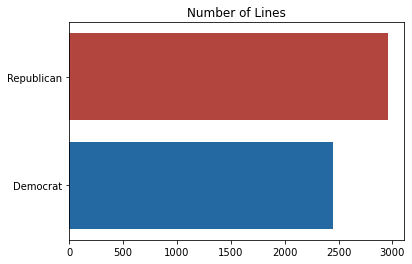

In [8]:
plt.title("Number of Lines")
sns.barplot(
    x= [len(debate_filtered[debate_filtered["party"] == "Republican"]), len(debate_filtered[debate_filtered["party"] == "Democrat"])],
    y = ["Republican", "Democrat"] ,
    palette = {"Republican": "#c53429", "Democrat": "#0f6bb7"}
);

---

In [9]:
tokenizer = RegexpTokenizer(r'\w+')

debate_filtered["tokens"] = debate_filtered["text"].str.lower().apply(tokenizer.tokenize)

In [10]:
debate_filtered["tokens"] = [list(set(debate_filtered["tokens"][i])) for i in debate_filtered.index]

In [11]:
dem_words = [item for sublist in debate_filtered["tokens"][debate_filtered["party"] == "Democrat"] for item in sublist]
rep_words = [item for sublist in debate_filtered["tokens"][debate_filtered["party"] == "Republican"] for item in sublist]

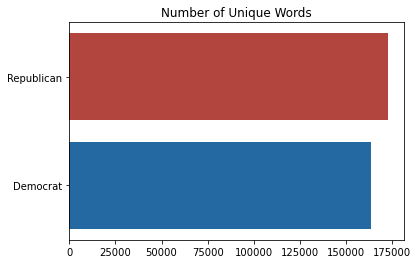

In [12]:
plt.title("Number of Unique Words")
sns.barplot(
    x= [len(rep_words), len(dem_words)],
    y = ["Republican", "Democrat"] ,
    palette = {"Republican": "#c53429", "Democrat": "#0f6bb7"}
);

----
## Sentiment Analysis

In [13]:
from textblob import TextBlob

In [14]:
debate_filtered.reset_index(drop=True, inplace=True)

Reading in the dataframe as data, the following code should give you a polarity (positive/negative sentiment) and subjectivity column.

In [15]:
debate_filtered['sentiment'] = debate_filtered['text'].apply(lambda x: TextBlob(x).sentiment)
sentiment = pd.DataFrame(debate_filtered['sentiment'].values.tolist())
debate_filtered = pd.concat([debate_filtered, sentiment], axis=1)

debate_filtered.drop(columns='sentiment', inplace=True)

rep_data = debate_filtered[debate_filtered['party']=='Republican']
dem_data = debate_filtered[debate_filtered['party']=='Democrat']

In [16]:
debate_filtered.head()

,speaker,text,date,party,year,tokens,polarity,subjectivity
0,PENCE,"Thank you.,",September 29 2020,Republican,2020,"[thank, you]",0.000000,0.000000
1,HARRIS,"Thank you Susan. Well, the American people ha...",September 29 2020,Democrat,2020,"[disease, 000, dead, leader, of, susan, today,...",0.169603,0.348862
2,PENCE,Susan thank you. And I want to thank the Comm...,September 29 2020,Republican,2020,"[literally, so, utah, privilege, cases, quite,...",0.111378,0.423008
3,HARRIS,"Oh, absolutely. Whatever the Vice President’s...",September 29 2020,Democrat,2020,"[000, dead, of, wanted, that, administration, ...",0.033333,0.425000
4,HARRIS,"No, I – Susan, I – This is important –,",September 29 2020,Democrat,2020,"[important, no, this, i, is, susan]",0.400000,1.000000


Graphs of the scores can be made in several ways:

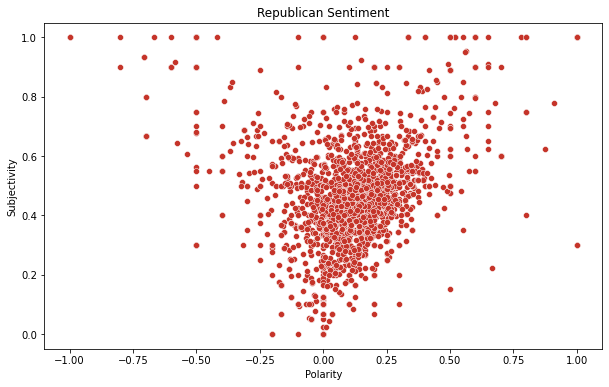

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Republican Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
sns.scatterplot(x=rep_data['polarity'],
                y=rep_data['subjectivity'], 
                color= "#c53429");

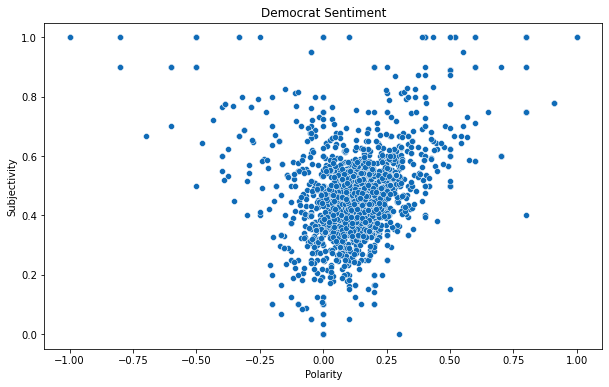

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Democrat Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
sns.scatterplot(x=dem_data['polarity'],
                y=dem_data['subjectivity'], 
                color = "#0f6bb7");

You can also see here that there isn't much separation in the data

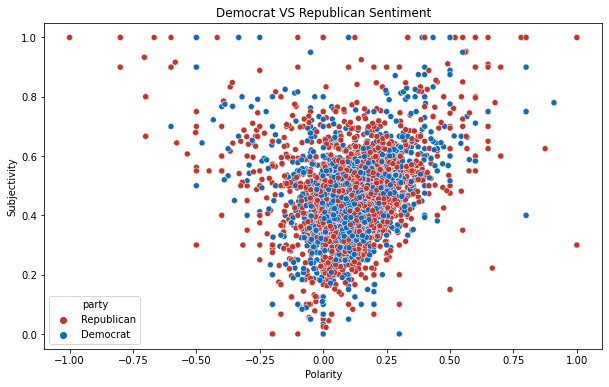

In [19]:
plt.figure(figsize=(10, 6))
plt.title("Democrat VS Republican Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
sns.scatterplot(x=debate_filtered['polarity'],
                y=debate_filtered['subjectivity'],
                hue = debate_filtered['party'],
                palette = {"Republican": "#c53429", "Democrat": "#0f6bb7"} );

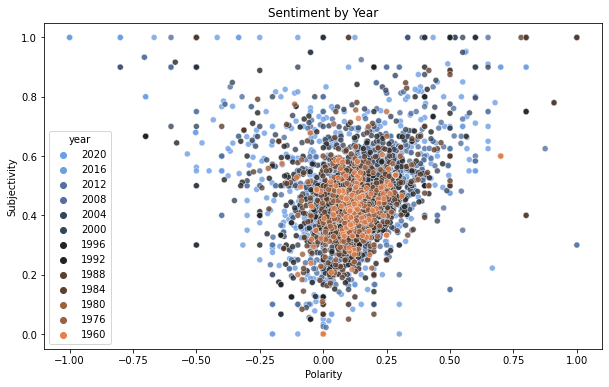

In [20]:
plt.figure(figsize=(10, 6))
plt.title("Sentiment by Year")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
sns.scatterplot(x=debate_filtered['polarity'],
                y=debate_filtered['subjectivity'],
                hue = debate_filtered['year'], 
                palette = {
                    "1960": "#e2814d",
                    "1976": "#9e5f3e",
                    "1980": "#9e5f3e", 
                    "1984": "#5e3f2e", 
                    "1988": "#5e3f2e",
                    "1992": "#222325", 
                    "1996": "#222325", 
                    "2000": "#37455b", 
                    "2004": "#37455b", 
                    "2008": "#51719e", 
                    "2012": "#51719e", 
                    "2016": "#6c9ee5",
                    "2020": "#6c9ee5"
                },
                alpha = 0.8);

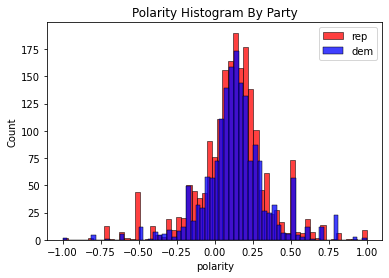

In [29]:
plt.title("Polarity Histogram By Party")
sns.histplot(rep_data[rep_data['polarity'] != 0]['polarity'], color='red', label='rep');
sns.histplot(dem_data[dem_data['polarity'] != 0]['polarity'], color='blue', label ='dem');
plt.legend();

----
### Wordclouds

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["ve", "re", "m", "u", "ll", "s"])

def show_wordcloud(data, color):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words = 75,
        max_font_size=60, 
        scale=3,
        colormap = color,
        width = 400, 
        height = 250, 
        random_state=7 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
# Source : https://stackoverflow.com/a/48750930

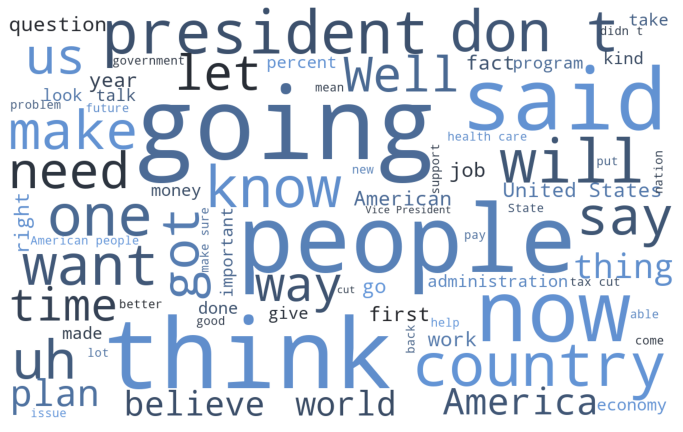

In [22]:
color = sns.dark_palette("#69d", reverse=True, as_cmap=True)
show_wordcloud(" ".join(debate_filtered["text"][debate_filtered["party"] == "Democrat"]), color)

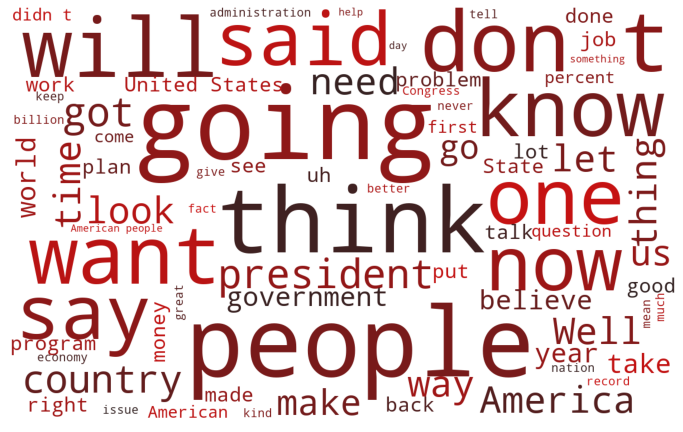

In [23]:
color = sns.dark_palette("#C11", reverse=True, as_cmap=True)
show_wordcloud(" ".join(debate_filtered["text"][debate_filtered["party"] == "Republican"]), color)

-----
### Sentiment Timeline During the September 29, 2020 Trump vs Biden Debate

In [24]:
biden = debate_filtered[(debate_filtered["speaker"] == "BIDEN") & (debate_filtered["date"] == 'September 29 2020')]

In [25]:
trump = debate_filtered[(debate_filtered["speaker"] == "TRUMP") & (debate_filtered["date"] == 'September 29 2020')]

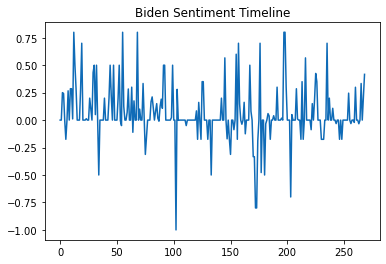

In [26]:
sentiment = [TextBlob(i).sentiment[0] for i in biden["text"]]
plt.title("Biden Sentiment Timeline")
sns.lineplot(x=range(len(sentiment)), y = sentiment, color = "#0f6bb7");

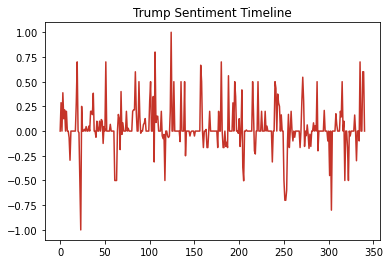

In [27]:
sentiment = [TextBlob(i).sentiment[0] for i in trump["text"]]
plt.title("Trump Sentiment Timeline")
sns.lineplot(x=range(len(sentiment)), y = sentiment, color = "#c53429");

----
### Save DataFrame to CSV

In [28]:
#debate_filtered.to_csv("../Data/debate_filtered.csv", index=False)